## Dataset : Boston
### Goal      : Predict medv column in Test Dataset!
<ol>
<li>	<b>	crim	:	</b>	per capita crime rate by town.
<li>	<b>	zn	:	</b>	proportion of residential land zoned for lots over 25,000 sq.ft.
<li>	<b>	indus	:	</b>	proportion of non-retail business acres per town.
<li>	<b>	chas	:	</b>	Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
<li>	<b>	nox	:	</b>	nitrogen oxides concentration (parts per 10 million).
<li>	<b>	rm	:	</b>	average number of rooms per dwelling.
<li>	<b>	age	:	</b>	proportion of owner-occupied units built prior to 1940.
<li>	<b>	dis	:	</b>	weighted mean of distances to five Boston employment centres.
<li>	<b>	rad	:	</b>	index of accessibility to radial highways.
<li>	<b>	tax	:	</b>	full-value property-tax rate per &#36;10,000.
<li>	<b>	ptratio	:	</b>	pupil-teacher ratio by town.
<li>	<b>	black	:	</b>	1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
<li>	<b>	lstat	:	</b>	lower status of the population (percent).
<li>	<b>	medv	:	</b>	median value of owner-occupied homes in &#36;1000s.
</ol>

### Core Imports

In [2]:
# Primary Imports

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib.backends.backend_pdf import PdfPages

### Load Data into Pandas Dataframe

In [45]:
# Get Current working directory
cwd = os.getcwd()

# Update Current Working Directory
cwd = "/home/nbuser/library/Datasets/boston/"

# Load data into a Pandas Dataframe Object
file = cwd+'train.csv'
df_train = pd.read_csv(file)

### Return the first n rows.

This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it

#### DataFrame.tail(n=5) - Return the last n rows

In [5]:
# peek preview into the data
df_train.head(6)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0


### Print a concise summary of a DataFrame.

This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [6]:
# Information on the Dataframe
print("\n\n", df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


 None


### Understand Correlation between Dependednt (medv) and other Features

In [20]:
corr = df_train.corr().tail(1)
corr.sort_values(by='medv',axis=1)

,lstat,ptratio,indus,tax,nox,crim,age,rad,ID,chas,dis,black,zn,rm,medv
medv,-0.7386,-0.481376,-0.473932,-0.448078,-0.413054,-0.407454,-0.358888,-0.352251,-0.221694,0.20439,0.249422,0.33666,0.344842,0.689598,1.0


### Correlation Based Inferences
<ol>
 <li> ID Column though has Negative correlation but actually does not have any value to the Data. Eliminating at at later stage
 <li> rm : average number of rooms per dwelling has High Correlation with medv (Dependent Variable)
 <li> lstat : lower status of the population (percent) has High Correlation with medv (Dependent Variable)

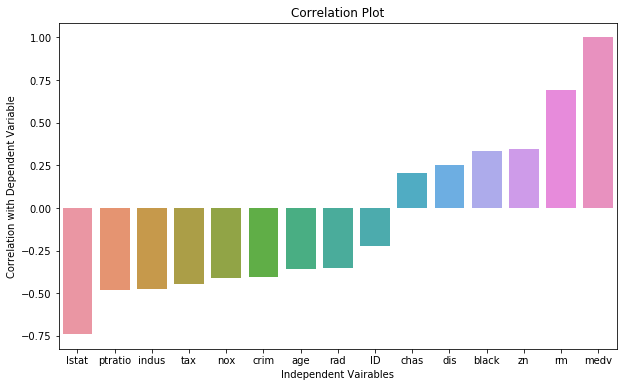

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

plt.title("Correlation Plot")
plt.xlabel("Independent Vairables")
plt.ylabel("Correlation with Dependent Variable")

ax = sns.barplot(data=corr.sort_values(by='medv',axis=1))

#pdf_pages = PdfPages('Plots/boston/Correlation.pdf')
#pdf_pages.savefig(fig)
#pdf_pages.close()

###  Bi-variate Data visualization

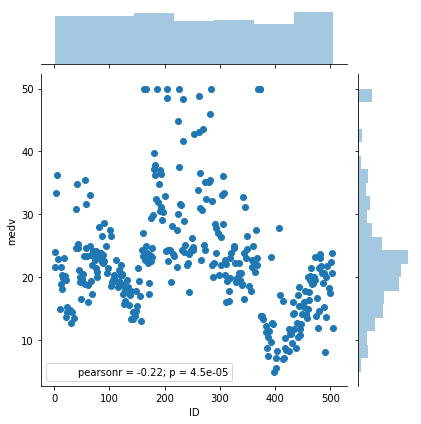

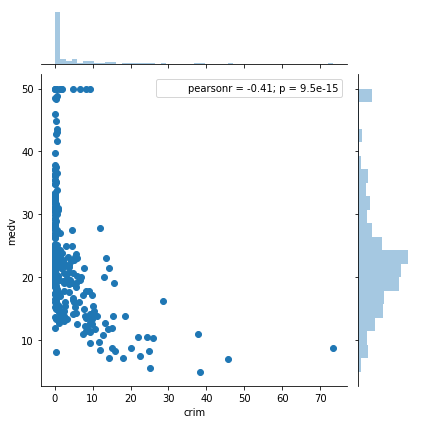

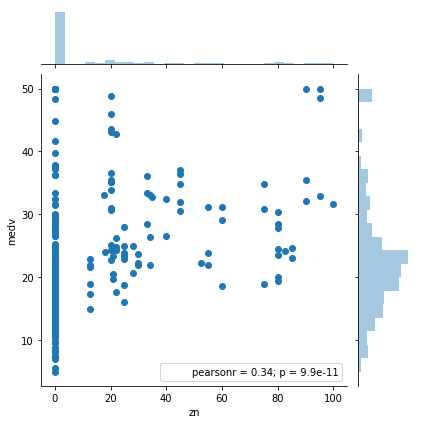

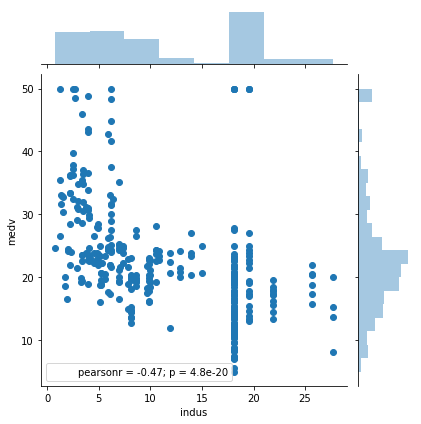

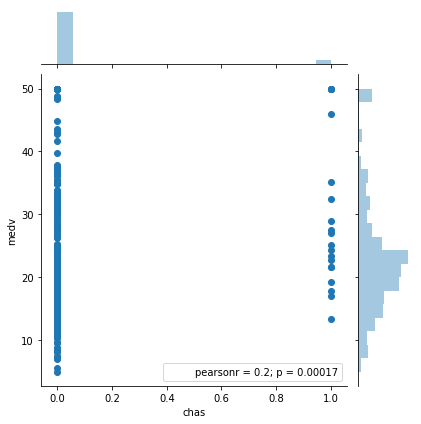

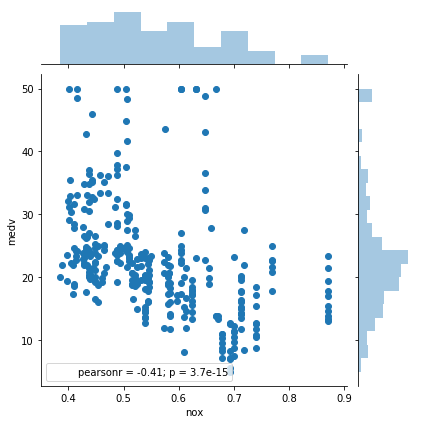

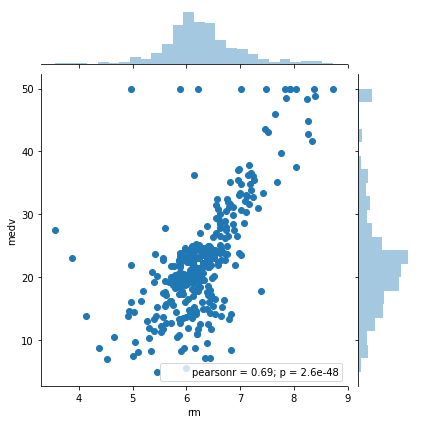

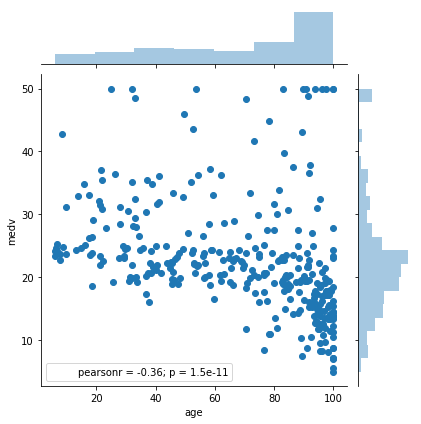

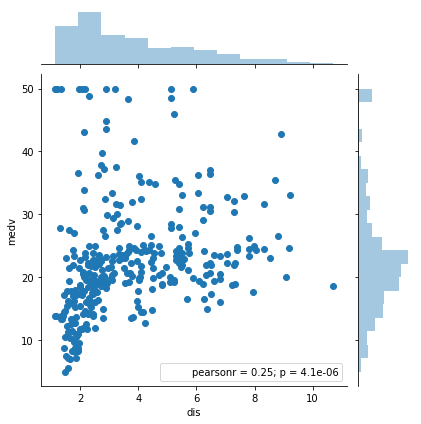

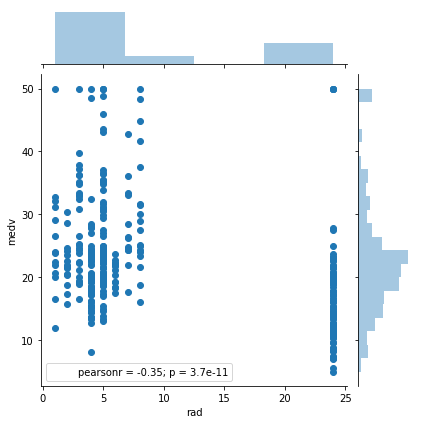

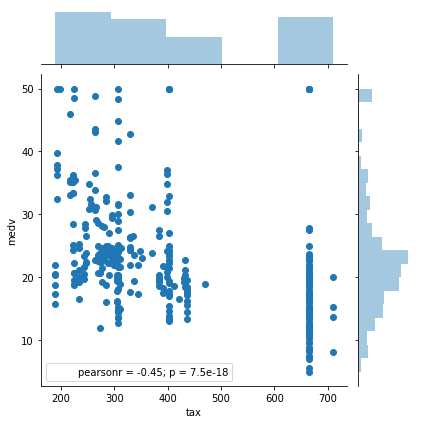

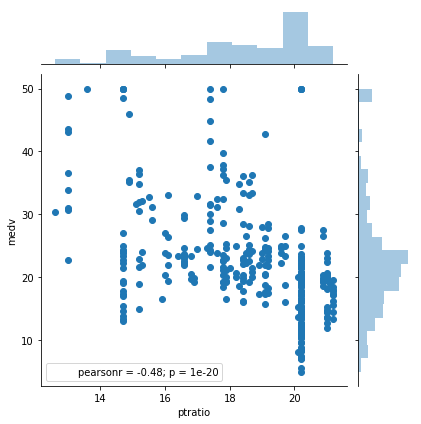

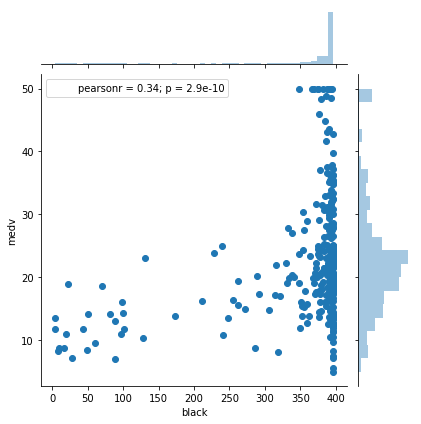

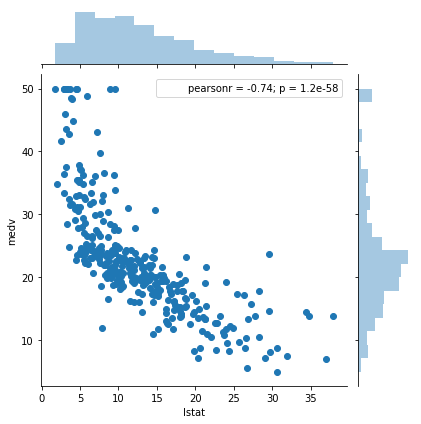

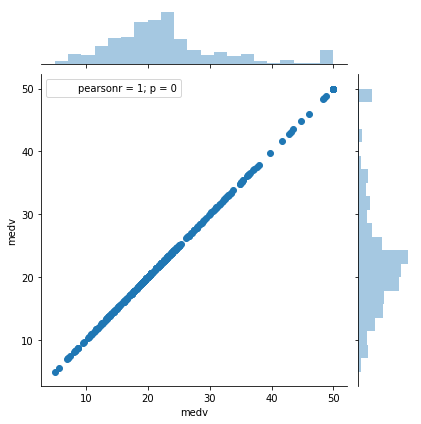

In [7]:
for index, columns in enumerate(df_train.columns):
    svm = sns.jointplot(df_train[df_train.columns[index]],df_train.medv)

#### Removed ID Column after sorting on ID

In [46]:
df_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [47]:
df_train = df_train.sort_values('ID')
df_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [48]:
df_train = df_train.drop('ID',axis=1)

print("ID Column Dropped from Dataframe")

ID Column Dropped from Dataframe


In [49]:
df_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


##  Split Data into Test & Train - k-fold cross-validation

##### Benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm

<ul>

<li> <b>Motivation:</b> we need a way to choose between machine learning models and our goal is to estimate likely performance of a model on out-of-sample data.
<li> <b>Initial idea:</b> we can train and test on the same data. However this will cause overfitting. As the number of features in a dataset increases the problem will increase
<li><b>Alternative idea:</b> we can use train/test split. We can split the dataset into two pieces so that the model can be trained and tested on different data.
Then, testing accuracy is a better estimate than training accuracy of out-of-sample performance.
</ul>

In [50]:
features = df_train.drop('medv', axis = 1)
print(" Dependent variable : 'medv' Column removed from features")
features.head()

 Dependent variable : 'medv' Column removed from features


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


In [51]:
price = df_train['medv']
price.head()

0    24.0
1    21.6
2    33.4
3    36.2
4    22.9
Name: medv, dtype: float64

#### train_test_split

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, shuffle=True)

# Success
print("Training and testing split was successful")

Training and testing split was successful


In [54]:
print("Training features dimension :",X_train.shape)
print("Training Target dimension :",y_train.shape)
print("Test features dimension :",X_test.shape)
print("Test Target dimension :",y_test.shape)

Training features dimension : (266, 13)
Training Target dimension : (266,)
Test features dimension : (67, 13)
Test Target dimension : (67,)


In [55]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
76,0.14231,0.0,10.01,0,0.5470,6.254,84.2,2.2565,6,432,17.8,388.74,10.45
109,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73
128,0.09103,0.0,2.46,0,0.4880,7.155,92.2,2.7006,3,193,17.8,394.12,4.82
11,1.05393,0.0,8.14,0,0.5380,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
186,0.21038,20.0,3.33,0,0.4429,6.812,32.2,4.1007,5,216,14.9,396.90,4.85


## Linear regression Model - [Mark 1 : lm0]

### The Direct Approach

##### Model Defination

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lm0 = LinearRegression(fit_intercept=True,normalize=False)
print("Parameters of Linear Regressor function : ",lm0.get_params)

Parameters of Linear Regressor function :  <bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


##### Model Training

In [59]:
lm0.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

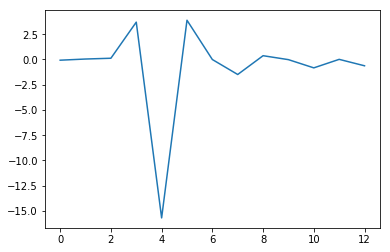

In [60]:
# The coefficients
plt.plot(lm0.coef_)

##### Prediction of Y based on test sample

In [61]:
y_pred = lm0.predict(X_test)
print("Total number of predicted values = ",y_pred.shape)

Total number of predicted values =  (67,)


#### Model Evaluation

##### 1. root-mean-square error (RMSE) for the Model
##### 2. R-Sqauared for the Model

In [62]:
from math import sqrt

#Calculate root-mean-square error (RMSE):
print("R-Squared for the above model : ",r2_score(y_test,y_pred)*100,"%")

#Calculate R-squared for the Model:
print("\nroot-mean-square error (RMSE) for the model is : ",sqrt(mean_squared_error(y_test,y_pred)))

R-Squared for the above model :  79.4289122719596 %

root-mean-square error (RMSE) for the model is :  3.6661869736631774


##### 1. Using Statmodels.api to train the model
##### 2. Print Summary for the Model

In [68]:
import statsmodels.api as sm

model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     422.0
Date:                Wed, 04 Jul 2018   Prob (F-statistic):          3.58e-163
Time:                        13:16:45   Log-Likelihood:                -813.91
No. Observations:                 266   AIC:                             1654.
Df Residuals:                     253   BIC:                             1700.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0417      0.065     -0.641      0.522      -0.170       0.087
zn             0.0534      0.021      2.577      0.011       0.013       0.094
indus          0.0847      0.094      0.902      0.368      -0.100       0.270
chas           3.7959      1.282      2.960      0.003       1.271       6.321
nox           -1.7112      4.840     -0.354      0.724     -11.244       7.821
rm             5.5245      0.459     12.045      0.000       4.621       6.428
age           -0.0096      0.020     -0.472      0.637      -0.050       0.031
dis           -1.0685      0.309     -3.457      0.001      -1.677      -0.460
rad            0.2382      0.093      2.560      0.011       0.055       0.422
tax           -0.0112      0.005     -2.054      0.041      -0.022      -0.000
ptratio       -0.3179      0.165     -1.930      0.055      -0.642       0.007
black          0.0196      0.004      4.770      0.000       0.011       0.028
lstat         -0.5588      0.073     -7.676      0.000      -0.702      -0.415
==============================================================================
Omnibus:                      112.989   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.996
Skew:                           1.724   Prob(JB):                    3.62e-110
Kurtosis:                       8.796   Cond. No.                     8.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear regression Model - [Mark 2 : lm1]

#### Remove 'chas' Feature and Re-evaluate  [ It was a Horrible Idea ]

In [79]:
features = df_train.drop('chas', axis = 1)
features = features.drop('medv', axis = 1)

In [80]:
features.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


In [81]:
lm1 = LinearRegression(fit_intercept=True,normalize=False)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, shuffle=True)

# Success
print("Training and testing split was successful")

Training and testing split was successful


In [90]:
X_train.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat
33,0.04981,21.0,5.64,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43
245,9.23230,0.0,18.10,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53
45,0.05789,12.5,6.07,0.409,5.878,21.4,6.4980,4,345,18.9,396.21,8.10
19,1.35472,0.0,8.14,0.538,6.072,100.0,4.1750,4,307,21.0,376.73,13.04
110,1.51902,0.0,19.58,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32


In [91]:
lm1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

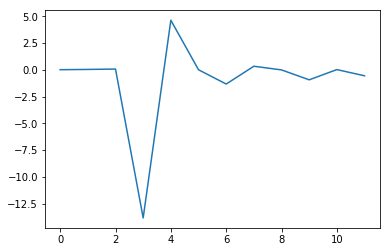

In [92]:
# The coefficients
plt.plot(lm1.coef_)

In [69]:
y_pred = lm0.predict(X_test)
print("Total number of predicted values = ",y_pred.shape)

Total number of predicted values =  (67,)


In [33]:
#Calculate root-mean-square error (RMSE):
print("R-Squared for the above model : ",r2_score(y_test,y_pred)*100,"%")

#Calculate R-squared for the Model:
print("\nroot-mean-square error (RMSE) for the model is : ",sqrt(mean_squared_error(y_test,y_pred)))

R-Squared for the above model :  -42848.13371546218 %

root-mean-square error (RMSE) for the model is :  184.91621541266187


#### Kabooooooommmmmmm  : Inference - DO NOT DROP FEATURES WITHOUT THE MATHS TO SUPPORT IT

## Linear regression Model - [Mark 3 : lm2]

#### Feature Scaling

##### Data Preprocessing - Standardize features by removing the mean and scaling to unit variance

In [94]:
from sklearn import preprocessing

In [95]:
X_train, X_test, y_train, y_test = train_test_split(preprocessing.scale(features), price, test_size=0.2, shuffle=True)

# Success
print("Training and testing split was successful")

Training and testing split was successful


In [96]:
print("Training features dimension :",X_train.shape)
print("Training Target dimension :",y_train.shape)
print("Test features dimension :",X_test.shape)
print("Test Target dimension :",y_test.shape)

Training features dimension : (266, 12)
Training Target dimension : (266,)
Test features dimension : (67, 12)
Test Target dimension : (67,)


In [111]:
lm2 = LinearRegression(fit_intercept=True,normalize=False)

In [129]:
import sklearn.metrics as summary
import statsmodels.api as sm

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [101]:
lm2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

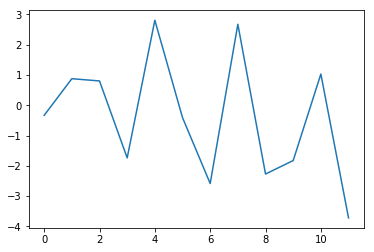

In [102]:
plt.plot(lm2.coef_)

In [103]:
y_pred = lm2.predict(X_test)
print("Total number of predicted values = ",y_pred.shape)

Total number of predicted values =  (67,)


In [108]:
#Calculate root-mean-square error (RMSE):
print("R-Squared for the above model : ",r2_score(y_test,y_pred)*100,"%")

#Calculate R-squared for the Model:
print("\nroot-mean-square error (RMSE) for the model is : ",sqrt(mean_squared_error(y_test,y_pred)))

R-Squared for the above model :  68.91031122191418 %

root-mean-square error (RMSE) for the model is :  5.981988818869587


In [110]:
lm1.coeff_

AttributeError: 'LinearRegression' object has no attribute 'coeff_'

### Inference - This seems to have Furthur Confused the Model

## Linear regression Model - [Mark 4 : lm3]

##### Step 1. Remove 'chas' 
##### Step 2. Feature Scaling

In [ ]:
lm0 = LinearRegression(fit_intercept=True,normalize=False)
print("Parameters of Linear Regressor function : ",lm0.get_params)